# Assignment 5

### MACS 30150, Dr. Evans
### Dongcheng Yang  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.stats import lognorm
import pandas as pd
import scipy.integrate as intgr
import numpy.linalg as lin

problem 1(a)

In [2]:
pts = np.loadtxt('data\incomes.txt')

C:\Users\pcc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 150000)

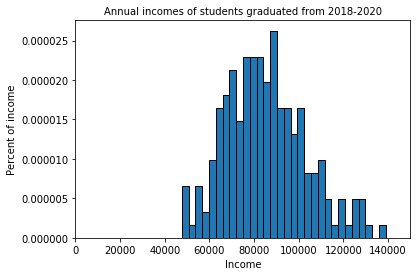

In [3]:
num_bins = 30
plt.hist(pts, num_bins,edgecolor='k',normed=True)
plt.title('Annual incomes of students graduated from 2018-2020', fontsize=10)
plt.xlabel(r'Income')
plt.ylabel('Percent of income')
plt.xlim([0, 150000])  # This gives the xmin and xmax to be plotted"

(b)

In [4]:
def log_normal_pdf(xvals, mu, sigma):
    return lognorm.pdf(xvals,s = abs(sigma), scale = np.exp(mu))

def data_moments(xvals):
    mean_data = xvals.mean()
    std_data = xvals.std()
    return mean_data, std_data

def model_moments(mu, sigma):
    mean_model = np.exp(mu+(sigma**2)/2)
    std_model = np.sqrt(np.exp(2*mu+sigma**2)*(np.exp(sigma**2)-1))
    return mean_model, std_model

def err_vec(xvals, mu, sigma, simple):

    mean_data, std_data = data_moments(xvals)
    moms_data = np.array([[mean_data], [std_data]])
    mean_model, std_model = model_moments(mu, sigma)
    moms_model = np.array([[mean_model], [std_model]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec

def criterion(params, *args):

    mu, sigma = params
    xvals, W = args
    err = err_vec(xvals, mu, sigma, simple=False)
    crit_val = err.T @ W @ err
    
    return crit_val

mu_init = 11
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
W_hat = np.eye(2)
gmm_args = (pts, W_hat)
results = opt.minimize(criterion, params_init, args=(gmm_args), tol=1e-14,
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM1, sig_GMM1 = results.x

C:\Users\pcc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


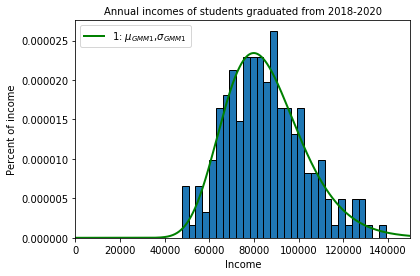

In [6]:
num_bins = 30
plt.hist(pts, num_bins,edgecolor='k',normed=True)
plt.title('Annual incomes of students graduated from 2018-2020', fontsize=10)
plt.xlabel(r'Income')
plt.ylabel('Percent of income')
plt.xlim([1e-9, 150000])  # This gives the xmin and xmax to be plotted"

dist_pts = np.linspace(1e-9, 150000, 200000)
mu_1 = mu_GMM1
sig_1 = sig_GMM1
plt.plot(dist_pts, log_normal_pdf(dist_pts, mu_1, sig_1 ),
         linewidth=2, color='g', label='1: $\mu_{GMM1}$,$\sigma_{GMM1}$')
plt.legend(loc='upper left')

In [7]:
print('mu_GMM1=', mu_GMM1, ' sig_GMM1=', sig_GMM1)
func_value = results.fun
mean_data, std_data = data_moments(pts)
mean_model, std_model = model_moments(mu_GMM1, sig_GMM1)
print("The value of GMM criterion function at \
the estimated parameter values:\n", func_value)
print('Mean of points =', mean_data, ', Variance of points =', std_data)
print('Mean of model =', mean_model, ', Variance of model =', std_model)
err1 = err_vec(pts, mu_GMM1, sig_GMM1, False).reshape(2,)
print('Error vector=', err1)

mu_GMM1= 11.331880866982898  sig_GMM1= 0.20869665246828492
The value of GMM criterion function at the estimated parameter values:
 [[1.00518646e-15]]
Mean of points = 85276.82360625811 , Variance of points = 17992.542128046523
Mean of model = 85276.82542230906 , Variance of model = 17992.541705444266
Error vector= [ 2.12959497e-08 -2.34876347e-08]


(c)

In [8]:
def get_Err_mat2(pts, mu, sigma, simple=False):
    R = 2
    N = len(pts)
    Err_mat = np.zeros((R, N))
    mean_model, std_model = model_moments(mu, sigma)
    if simple:
        Err_mat[0, :] = pts - mean_model
        Err_mat[1, :] = np.sqrt(((mean_data - pts) ** 2)) - std_model
    else:
        Err_mat[0, :] = (pts - mean_model) / mean_model
        Err_mat[1, :] = (np.sqrt(((mean_data - pts) ** 2)) - std_model) / std_model
    return Err_mat

Err_mat = get_Err_mat2(pts, mu_GMM1, sig_GMM1, False)
VCV2 = (1 / pts.shape[0]) * (Err_mat @ Err_mat.T)
print("The variance covariance matrix:\n", VCV2)
W_hat2 = lin.inv(VCV2)
print("The two-step estimator for \
the optimal weighting matrix:\n", W_hat2)

The variance covariance matrix:
 [[0.0445167  0.02724079]
 [0.02724079 0.40593057]]
The two-step estimator for the optimal weighting matrix:
 [[23.42542697 -1.57201059]
 [-1.57201059  2.56896842]]


In [9]:
mu_init = 11
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
gmm_args = (pts, W_hat2)
results2 = opt.minimize(criterion, params_init, args=(gmm_args),tol=1e-14,
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM2, sig_GMM2 = results2.x
print('mu_GMM2=', mu_GMM2, ' sig_GMM2=', sig_GMM2)

func_value2 = results2.fun
mean_data, std_data = data_moments(pts)
mean_model2, std_model2 = model_moments(mu_GMM2, sig_GMM2)
print("The value of GMM criterion function at \
the estimated parameter values:\n", func_value2)
print('Mean of points =', mean_data, ', Variance of points =', std_data)
print('Mean of model2 =', mean_model2, ', Variance of model2 =', std_model2)
err2 = err_vec(pts, mu_GMM2, sig_GMM2, False).reshape(2,)
print('Error vector=', err2)

mu_GMM2= 11.33188084234173  sig_GMM2= 0.20869665693060432
The value of GMM criterion function at the estimated parameter values:
 [[1.59457809e-15]]
Mean of points = 85276.82360625811 , Variance of points = 17992.542128046523
Mean of model2 = 85276.82340040439 , Variance of model2 = 17992.541671995466
Error vector= [-2.41394687e-09 -2.53466716e-08]


C:\Users\pcc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


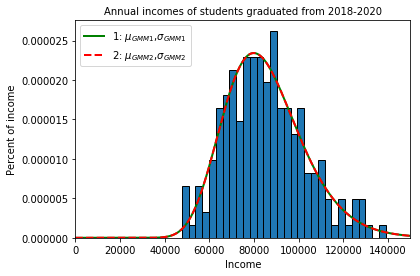

In [11]:
num_bins = 30
plt.hist(pts, num_bins,edgecolor='k',normed=True)
plt.title('Annual incomes of students graduated from 2018-2020', fontsize=10)
plt.xlabel(r'Income')
plt.ylabel('Percent of income')
plt.xlim([1e-9, 150000])  # This gives the xmin and xmax to be plotted"

dist_pts = np.linspace(1e-9, 150000, 200000)
mu_1 = mu_GMM1
sig_1 = sig_GMM1
plt.plot(dist_pts, log_normal_pdf(dist_pts, mu_1, sig_1),
         linewidth=2, color='g', label='1: $\mu_{GMM1}$,$\sigma_{GMM1}$')
plt.legend(loc='upper left')

dist_pts = np.linspace(1e-9, 150000, 200000)
mu_2 = mu_GMM2
sig_2 = sig_GMM2
plt.plot(dist_pts, log_normal_pdf(dist_pts, mu_2, sig_2 ),
         linewidth=2, color='r', label='2: $\mu_{GMM2}$,$\sigma_{GMM2}$',ls ='--')
plt.legend(loc='upper left')

(d)

In [12]:
def data_moments3(xvals):
    bpct_1_dat = xvals[xvals < 75000].shape[0] / xvals.shape[0]
    bpct_2_dat = (xvals[(xvals >=75000) & (xvals<=100000)].shape[0] /
                  xvals.shape[0])
    bpct_3_dat = xvals[xvals>100000].shape[0] / xvals.shape[0]
    return bpct_1_dat, bpct_2_dat, bpct_3_dat

def model_moments3(mu, sigma):
    xfx = lambda x: log_normal_pdf(x, mu, sigma)
    (bpct_1_mod, bp_1_err) = intgr.quad(xfx, 0.0, 75000)
    (bpct_2_mod, bp_2_err) = intgr.quad(xfx, 75000, 100000)
    (bpct_3_mod, bp_3_err) = intgr.quad(xfx, 100000, np.inf)
    return bpct_1_mod, bpct_2_mod, bpct_3_mod

def err_vec3(xvals, mu, sigma,simple):
    
    bpct_1_dat, bpct_2_dat, bpct_3_dat = data_moments3(xvals)
    moms_data = np.array([[bpct_1_dat], [bpct_2_dat], [bpct_3_dat]])
    bpct_1_mod, bpct_2_mod, bpct_3_mod = model_moments3(mu, sigma)
    moms_model = np.array([[bpct_1_mod], [bpct_2_mod], [bpct_3_mod]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec


def criterion3(params, *args):
    mu, sigma = params
    xvals, W = args
    err = err_vec3(xvals, mu, sigma, simple=False)
    crit_val = err.T @ W @ err 
    return crit_val


mu_init = 11
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
W_hat1_3 = np.eye(3)
gmm_args = (pts, W_hat1_3)
results_3 = opt.minimize(criterion3, params_init, args=(gmm_args),tol=1e-14,
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM1_3, sig_GMM1_3 = results_3.x

C:\Users\pcc\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


C:\Users\pcc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


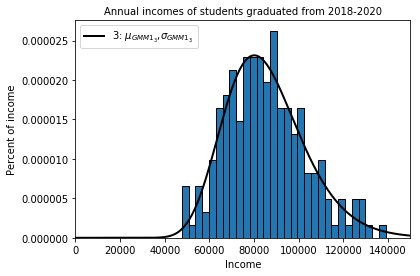

In [13]:
num_bins = 30
plt.hist(pts, num_bins,edgecolor='k',normed=True)
plt.title('Annual incomes of students graduated from 2018-2020', fontsize=10)
plt.xlabel(r'Income')
plt.ylabel('Percent of income')
plt.xlim([1e-9, 150000])  # This gives the xmin and xmax to be plotted"

dist_pts = np.linspace(1e-9, 150000, 200000)
mu_3 = mu_GMM1_3
sig_3 = sig_GMM1_3
plt.plot(dist_pts, log_normal_pdf(dist_pts, mu_3, sig_3 ),
         linewidth=2, color='k', label='3: $\mu_{GMM1_3}$,$\sigma_{GMM1_3}$')
plt.legend(loc='upper left')

In [14]:
params = np.array([mu_GMM1_3, sig_GMM1_3])
print('mu_GMM1_3=', mu_GMM1_3, ' sig_GMM1_3=', sig_GMM1_3)
func_value3 = results_3.fun
print("The value of GMM criterion function at \
the estimated parameter values:\n", func_value3)
print("Data moments: ", data_moments3(pts))
print("Model moments:", model_moments3(mu_GMM1_3, sig_GMM1_3))

mu_GMM1_3= 11.335681327424783  sig_GMM1_3= 0.21059845372069547
The value of GMM criterion function at the estimated parameter values:
 [[2.53378859e-15]]
Data moments:  (0.3, 0.5, 0.2)
Model moments: (0.30000000363266727, 0.5000000058543161, 0.19999999051301676)


(e)

In [15]:
def get_Err_mat3(pts, mu, sigma, simple=False):
    R = 3
    N = len(pts)
    Err_mat = np.zeros((R, N))
    pct_1_mod, pct_2_mod, pct_3_mod = model_moments3(mu, sigma)
    if simple:
        pts_in_grp1 = pts < 75000
        Err_mat[0, :] = pts_in_grp1 - pct_1_mod
        pts_in_grp2 = (pts >= 75000) & (pts <= 100000)
        Err_mat[1, :] = pts_in_grp2 - pct_2_mod
        pts_in_grp3 = pts > 100000
        Err_mat[2, :] = pts_in_grp3 - pct_3_mod
    else:
        pts_in_grp1 = pts < 75000
        Err_mat[0, :] = (pts_in_grp1 - pct_1_mod) / pct_1_mod
        pts_in_grp2 = (pts >= 75000) & (pts <= 100000)
        Err_mat[1, :] = (pts_in_grp2 - pct_2_mod) / pct_2_mod
        pts_in_grp3 = pts > 100000
        Err_mat[2, :] = (pts_in_grp3 - pct_3_mod) / pct_3_mod
    return Err_mat

Err_mat3 = get_Err_mat3(pts, mu_GMM1_3, sig_GMM1_3, False)
VCV2_3 = (1 / pts.shape[0]) * (Err_mat3 @ Err_mat3.T)
print("The variance covariance matrix:\n", VCV2_3)
# I use the pseudo-inverse command here because the VCV matrix is poorly conditioned
W_hat2_3 = lin.pinv(VCV2_3)
print("The two-step estimator for \
the optimal weighting matrix:\n", W_hat2_3)

The variance covariance matrix:
 [[ 2.33333328 -0.99999998 -1.00000004]
 [-0.99999998  0.99999998 -1.00000004]
 [-1.00000004 -1.00000004  4.00000038]]
The two-step estimator for the optimal weighting matrix:
 [[ 0.25761773 -0.14958449 -0.01246537]
 [-0.14958449  0.11911357 -0.07340719]
 [-0.01246537 -0.07340719  0.20221605]]


In [16]:
mu_init = 11
sig_init = 1
params_init = np.array([mu_init, sig_init])
gmm_args = (pts, W_hat2_3)
results2_3 = opt.minimize(criterion3, params_init, args=(gmm_args),tol=1e-14,
                          method='L-BFGS-B', bounds=((1e-10, None), (1e-2, None)))
mu_GMM2_3, sig_GMM2_3 = results2_3.x
print('mu_GMM2_3=', mu_GMM2_3, ' sig_GMM2_3=', sig_GMM2_3)
params = np.array([mu_GMM2_3, sig_GMM2_3])
func_value2_3 = results2_3.fun
print("The value of GMM criterion function at \
the estimated parameter values:\n", func_value2_3)
print("Data moments: ", data_moments3(pts))
print("Model moments:", model_moments3(mu_GMM2_3, sig_GMM2_3))

C:\Users\pcc\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


mu_GMM2_3= 11.335681328964448  sig_GMM2_3= 0.2105984532557043
The value of GMM criterion function at the estimated parameter values:
 [[4.24195251e-16]]
Data moments:  (0.3, 0.5, 0.2)
Model moments: (0.3000000006881451, 0.5000000072723064, 0.19999999203954869)


C:\Users\pcc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


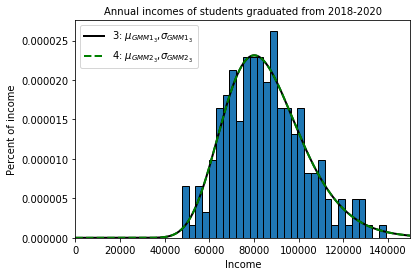

In [17]:
num_bins = 30
plt.hist(pts, num_bins,edgecolor='k',normed=True)
plt.title('Annual incomes of students graduated from 2018-2020', fontsize=10)
plt.xlabel(r'Income')
plt.ylabel('Percent of income')
plt.xlim([1e-9, 150000])  # This gives the xmin and xmax to be plotted"

dist_pts = np.linspace(1e-9, 150000, 200000)
mu_3 = mu_GMM1_3
sig_3 = sig_GMM1_3
plt.plot(dist_pts, log_normal_pdf(dist_pts, mu_3, sig_3 ),
         linewidth=2, color='k', label='3: $\mu_{GMM1_3}$,$\sigma_{GMM1_3}$')
plt.legend(loc='upper left')

dist_pts = np.linspace(1e-9, 150000, 200000)
mu_4 = mu_GMM2_3
sig_4 = sig_GMM2_3
plt.plot(dist_pts, log_normal_pdf(dist_pts, mu_4, sig_4 ),
         linewidth=2, color='g', label='4: $\mu_{GMM2_3}$,$\sigma_{GMM2_3}$',ls ='--')
plt.legend(loc='upper left')

(f)

In [22]:
mu = [mu_GMM1,mu_GMM2,mu_GMM1_3,mu_GMM2_3]
sig = [sig_GMM1,sig_GMM2,sig_GMM1_3,sig_GMM2_3]
funcv = [func_value, func_value2, func_value3, func_value2_3]
pd.DataFrame({"mu":mu,"sigma":sig,"Value of GMM func":funcv}
            ,index=['2 moments with Identity Matrix','2 moments with Weighted Matrix',
                   '3 moments with Identity Matrix','3 moments with Weighted Matrix']) \
             .astype(float)

,mu,sigma,Value of GMM func
2 moments with Identity Matrix,11.331881,0.208697,1.005186e-15
2 moments with Weighted Matrix,11.331881,0.208697,1.594578e-15
3 moments with Identity Matrix,11.335681,0.210598,2.533789e-15
3 moments with Weighted Matrix,11.335681,0.210598,4.241953e-16


From the perspective of comparing criterion function value, the method 4 which use 3 moments and the two-step estimator fits the data best.

problem 2(a)

In [19]:
df = pd.read_csv("data/sick.txt").astype('float64')
df.head()

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


In [20]:
def err_vec(y, x1, x2, x3, b0, b1, b2, b3, simple):
    y_hat = b0 + b1*x1 + b2*x2 + b3*x3
    if simple:
        return y - y_hat
    else:
        return (y - y_hat)/ y_hat
    
def crit(params, *args):
    b0, b1, b2, b3 = params
    y, x1, x2, x3, W = args
    err = err_vec(y, x1, x2, x3, b0, b1, b2, b3, True)
    crit_val = err.T @ W @ err
    return crit_val

In [21]:
params_init = np.array([1, 0, 0, 0])
W_hat = np.eye(200)
gmm_args = (df.sick, df.age, df.children, df.avgtemp_winter, W_hat)
res = opt.minimize(crit, params_init, args=(gmm_args),tol=1e-14, method='L-BFGS-B')
b0, b1, b2, b3 = res.x
val_crit = res.fun
print("Estimate of b0:",b0)
print("Estimate of b1:",b1)
print("Estimate of b2:",b2)
print("Estimate of b3:",b3)
print('Value of GMM criterion function:',val_crit)

Estimate of b0: 0.2516448636612042
Estimate of b1: 0.012933470965564249
Estimate of b2: 0.40050098470289774
Estimate of b3: -0.009991709711286762
Value of GMM criterion function: 0.0018212898060782808
